In [1]:
from numpy import *
import uncertainties.unumpy as unp
from uncertainties import *
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import smd
import ggplot as gg
matplotlib.style.use('ggplot')

In [2]:
cov = [(0.2**2, -0.064 / 2), (-0.064 / 2, 0.2**2)]
def f(x,a):
    return a[0]+a[1]*x

In [3]:
data = pd.DataFrame(columns=["x", "Analytical", "Monte Carlo"])

data['x'] = linspace(-10, 10, 1000)
a_analytical = correlated_values((1, 1), cov)

In [4]:
samples = 10000
a_mc = random.multivariate_normal((1,1),cov,samples)

def std_dev_mc(x_array):
    return_value = []
    for x in x_array:
        diff = 0
        for k in range(samples):
            diff += (f(x,(1,1))-f(x,a_mc[k]))**2/samples
        return_value.append(sqrt(diff))
    return return_value

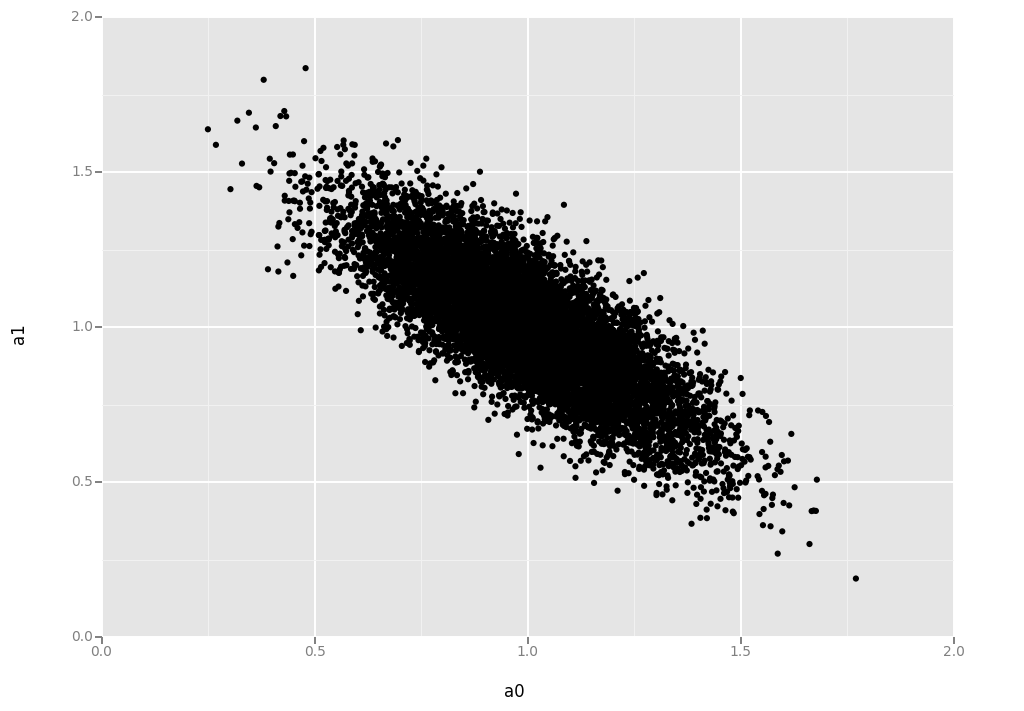

<ggplot: (-9223363263202777340)>

In [22]:
gg.qplot(a_mc[:,0],a_mc[:,1])+gg.xlab('a0')+gg.ylab('a1')

In [9]:
data['Analytical'] = unp.std_devs(f(data['x'],a_analytical))
data['Monte Carlo'] = smd.parallel_slice(std_dev_mc,data['x'])
data['Absolute Difference'] = abs(data['Analytical']-data['Monte Carlo'])

# Plot
def plot_1():
    data.drop('Absolute Difference',1).plot.line(x='x')
    plt.title("Std Devs")
    plt.savefig("figs/4b-b.pdf")

def plot_2():
    data.plot.line(x='x',y='Absolute Difference')
    plt.yscale('log')
    plt.title("Monte Carlo vs. Analytical")
    plt.savefig("figs/4b-c.pdf")
    
smd.runInParallel((plot_1,plot_2))



Using 4 cores.


Process Process-25:
Process Process-26:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-9-925ae5013797>", line 15, in plot_2
    plt.savefig("figs/4b-c.pdf")
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/site-packages/matplotlib/pyplot.py", line 688, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/usr/lib/python3.5/site-packages/matplotlib/figure.py", line 1565, in savefig
    self.canvas.print_figure(*args, **kwargs)
  File "/usr/lib/python3.5/site-packages/matplotlib/backend_bases.py", line 2232, in print_figure
    **kwargs)
  F